# Traditional Machine Learning and Deep Learning

Author: Allmin Susaiyah

Name of student: <fill your name>

In this notebook, various machine learning operations of python are covered. shift + Enter will excecute each cell

# Simple ML Example

In [37]:
import numpy as np
X = np.array([[6000], [4000], [4500], [4230], [2227]]) #training
y = np.array([15000, 23241, 43000, 9990, 69900])

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X, y) 
coef = clf.coef_
print(coef)


[-13.90222634]


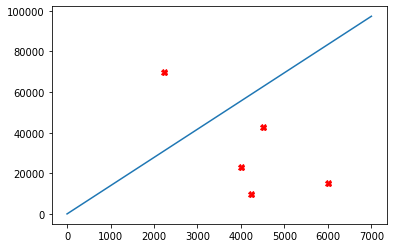

In [38]:
import matplotlib.pyplot as plt

plt.plot()

x_axis = np.linspace(0, 7000)
y_axis = [(0- coef[0]*x) for x in x_axis]
plt.plot(x_axis,y_axis)

plt.plot(X,y, 'rX')

In [54]:
X_ = np.array([[1150], [5000]]) #validation
y_ = np.array([3499, 12447])
y_predicted = clf.predict(X_)
print(type(y_))
print(y_predicted, y_)

from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_, y_predicted)
print('error:',error)

<class 'numpy.ndarray'>
[74508.43120535 20984.85977752] [ 3499 12447]
error: 39773.64549143447


In [55]:
print(clf.predict([[2815]])) #deployment
print(clf.predict([[4300]]))


[51361.22434111]
[30716.41821895]


# Problem varying performance

[-4.40384078]
<class 'numpy.ndarray'>
[36571.81145251 31828.87493017] [ 3499 69900]
error: 35571.968261173184
[29239.41655028]
[22699.71298883]


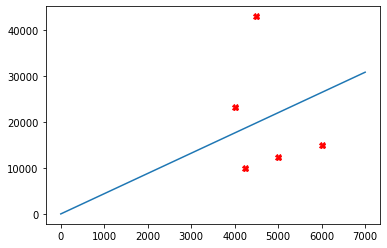

In [57]:

X = np.array([[6000], [4000], [4500], [4230], [5000]]) #training
y = np.array([15000, 23241, 43000, 9990, 12447])

clf = LinearRegression()
clf.fit(X, y) 
coef = clf.coef_
print(coef)
plt.plot()

x_axis = np.linspace(0, 7000)
y_axis = [(0- coef[0]*x) for x in x_axis]
plt.plot(x_axis,y_axis)

plt.plot(X,y, 'rX')
X_ = np.array([[1150], [2227]]) #validation
y_ = np.array([3499, 69900])
y_predicted = clf.predict(X_)
print(type(y_))
print(y_predicted, y_)


error = mean_absolute_error(y_, y_predicted)
print('error:',error)
print(clf.predict([[2815]])) #deployment
print(clf.predict([[4300]]))

# Practical Example
download data from: https://data.mendeley.com/datasets/7dybx7wyfn/3
extract such that c:/mlworkshop has the folder 'C:/mlworkshopECG signals (1000 fragments)/MLII'

In [71]:
#import libraries
import os
%matplotlib inline
import numpy as np
from scipy import signal
from scipy.io import loadmat
from scipy.fftpack import fft

In [72]:
# defining data folders and extraction
# here we are taking ecg signals of two classes : NSR and AFL
# our aim is to classify these signals into respective classes

SIGNAL_FOLDER_PATH = 'ECG signals (1000 fragments)'
C1_path = SIGNAL_FOLDER_PATH + '/MLII/1 NSR'
C2_path = SIGNAL_FOLDER_PATH + '/MLII/3 AFL'
from glob import glob
C1_list = glob(C1_path + '/*')
C2_list = glob(C2_path + '/*')


def norm1d(sig):
    sig=np.float32(sig)
    sig-=np.min(sig)
    sig/=np.max(sig)
    return(sig)

def get_fft_label_mat(mat_file):
    label = mat_file.strip(os.path.basename(mat_file))
    print(label)
    label = label.strip(os.path.sep)
    print(label)
    label = label.split('/')[-1]
    print(label)
    mat_dict = loadmat(mat_file)
    mat_signal = mat_dict['val']
    sig = norm1d(mat_signal[0])
    N = len(sig)
    fs = 360
    sig_fft = fft(sig)
    sig_fft = abs(sig_fft)[:N//2]
    return (sig_fft,label)

x,y = get_fft_label_mat(C2_list[0])
print(C2_list[0])
print(x)
print(y)
    

    
    

ECG signals (1000 fragments)/MLII/3 AFL\
ECG signals (1000 fragments)/MLII/3 AFL
3 AFL
ECG signals (1000 fragments)/MLII/3 AFL\202m (0).mat
[6.7169763e+02 4.4309162e+01 2.4707912e+01 ... 2.8317961e-01 1.5032250e-01
 2.0517671e-01]
3 AFL


In [73]:
C1_list

['ECG signals (1000 fragments)/MLII/1 NSR\\100m (0).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\100m (1).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\100m (2).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\100m (3).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\100m (4).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\100m (5).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\100m (6).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\100m (7).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\100m (8).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\100m (9).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\101m (0).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\101m (1).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\101m (10).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\101m (2).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\101m (3).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\101m (4).mat',
 'ECG signals (1000 fragments)/MLII/1 NSR\\101m (5).mat',
 'ECG signals

In [74]:
#fetching the data and printing
all_list = C1_list
[all_list.append(i) for i in C2_list]

for mat_file in all_list:
    x,y = get_fft_label_mat(mat_file)
    print(mat_file)
    print(x)
    print(y)

ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (0).mat
[6.3587854e+02 1.2047599e+01 1.6520775e+01 ... 8.4283695e-02 1.0343695e-01
 2.9277432e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (1).mat
[6.3628442e+02 4.0731441e+01 1.4781268e+01 ... 8.5639954e-02 4.8098624e-02
 2.1775635e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (2).mat
[6.9094238e+02 1.8235174e+01 6.6140461e+00 ... 9.8566622e-02 8.1284463e-02
 1.9769511e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (3).mat
[6.26259583e+02 3.12438049e+01 1.21703587e+01 ... 8.42780545e-02
 1.19196296e-01 2.99959660e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG s

ECG signals (1000 fragments)/MLII/1 NSR\105m (11).mat
[6.6890466e+02 2.3476330e+01 3.2028740e+01 ... 1.5917937e-01 2.4940464e-01
 6.6166267e-02]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\105m (12).mat
[7.1398730e+02 2.2061775e+01 2.9043341e+01 ... 1.1734854e-01 2.3207466e-01
 2.7050340e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\105m (13).mat
[6.8144275e+02 1.5797106e+01 9.2570629e+00 ... 1.3333605e-01 2.5824767e-01
 2.1801637e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\105m (2).mat
[6.5283728e+02 2.8017971e+01 1.8437922e+01 ... 3.5141963e-01 1.3425565e-01
 2.1426076e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\105m (3).

ECG signals (1000 fragments)/MLII/1 NSR\108m (20).mat
[1.7778605e+03 1.4269942e+02 7.8452911e+01 ... 2.1488100e-01 6.6834211e-02
 5.8846992e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\108m (3).mat
[2.2715781e+03 1.2007270e+02 5.5188377e+01 ... 2.0335819e-01 4.4483912e-01
 1.1327355e+00]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\108m (4).mat
[2.5057437e+03 8.0578094e+01 4.8879272e+01 ... 3.3614269e-01 5.0205702e-01
 7.3884976e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\108m (5).mat
[2.5377158e+03 8.7135803e+01 5.7184551e+01 ... 1.5252529e-01 2.1075194e-01
 4.2305025e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\108m (6).ma

ECG signals (1000 fragments)/MLII/1 NSR\113m (8).mat
[9.3462274e+02 9.5492828e+01 7.0454369e+01 ... 7.8349456e-02 1.6889593e-01
 2.0649788e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\113m (9).mat
[7.3733911e+02 6.7975433e+01 6.5894440e+01 ... 1.3680415e-01 2.3024324e-01
 1.1959530e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\114m (0).mat
[3.6218106e+02 1.9188683e+01 6.1445312e+00 ... 2.0359029e-01 2.1899523e-01
 3.6277431e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\114m (1).mat
[4.2872708e+02 3.0990662e+01 2.3756203e+01 ... 3.3453417e-01 2.4238586e-01
 3.2114965e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\114m (10).ma

ECG signals (1000 fragments)/MLII/1 NSR\116m (6).mat
[7.2539264e+02 2.7281729e+01 2.9970999e+01 ... 2.5675621e-02 6.5952308e-02
 1.4930290e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\116m (7).mat
[7.6236328e+02 2.6771473e+01 3.4314938e+01 ... 3.9675146e-02 9.9484958e-02
 1.6574278e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\117m (0).mat
[2.0223013e+03 4.2208702e+01 2.1672396e+01 ... 1.3982858e-01 4.1458711e-02
 3.8025981e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\117m (1).mat
[1.9456761e+03 3.2654461e+01 1.0237351e+01 ... 1.8884207e-01 3.0360162e-01
 2.4603155e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\117m (10).ma

ECG signals (1000 fragments)/MLII/1 NSR\122m (12).mat
[7.0538092e+02 3.4940613e+01 2.4313709e+01 ... 3.9496812e-01 2.9654789e-01
 5.0382930e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\122m (13).mat
[7.5461987e+02 3.1124071e+01 5.0366516e+01 ... 3.1369501e-01 3.5064018e-01
 5.7757211e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\122m (14).mat
[6.8994824e+02 3.5156433e+01 2.7031446e+01 ... 4.6939814e-01 4.2025208e-01
 4.0295068e-02]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\122m (2).mat
[7.9867462e+02 4.8121483e+01 6.1074997e+01 ... 2.8431752e-01 4.4539937e-01
 2.2782114e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\122m (3).

ECG signals (1000 fragments)/MLII/1 NSR\213m (1).mat
[1.0610842e+03 9.5654593e+00 1.6765427e+01 ... 4.9048230e-02 2.2002291e-02
 1.2189904e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\213m (10).mat
[1.0605688e+03 5.6248955e+01 2.0464048e+01 ... 3.8720319e-01 3.5909042e-01
 3.6861363e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\213m (11).mat
[1.0547690e+03 3.5381992e+01 1.7851400e+01 ... 5.5836894e-02 7.7919200e-02
 8.2307518e-02]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\213m (2).mat
[1.1052194e+03 3.1900482e+01 2.1684008e+01 ... 1.9214244e-01 2.1163301e-01
 2.6054710e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\213m (3).m

ECG signals (1000 fragments)/MLII/3 AFL\203m (0).mat
[8.9412024e+02 3.1648018e+01 1.6836584e+01 ... 1.1280051e-01 2.8665867e-01
 3.0973271e-01]
3 AFL
ECG signals (1000 fragments)/MLII/3 AFL\
ECG signals (1000 fragments)/MLII/3 AFL
3 AFL
ECG signals (1000 fragments)/MLII/3 AFL\203m (1).mat
[1.4603716e+03 4.3832573e+01 4.9008652e+01 ... 1.6771288e-01 2.8277108e-01
 3.0876288e-01]
3 AFL
ECG signals (1000 fragments)/MLII/3 AFL\
ECG signals (1000 fragments)/MLII/3 AFL
3 AFL
ECG signals (1000 fragments)/MLII/3 AFL\203m (2).mat
[8.0251532e+02 3.5344318e+01 1.9388062e+01 ... 2.7848101e-01 1.1262935e-01
 1.7486559e-01]
3 AFL
ECG signals (1000 fragments)/MLII/3 AFL\
ECG signals (1000 fragments)/MLII/3 AFL
3 AFL
ECG signals (1000 fragments)/MLII/3 AFL\222m (0).mat
[1.1807250e+03 5.9839455e+01 2.5531752e+01 ... 2.2400029e-01 3.4215561e-01
 3.3067453e-01]
3 AFL
ECG signals (1000 fragments)/MLII/3 AFL\
ECG signals (1000 fragments)/MLII/3 AFL
3 AFL
ECG signals (1000 fragments)/MLII/3 AFL\222m (1).mat

In [75]:
#fetching the data, appending data to list and printing

X = []
Y = []

all_list = C1_list
[all_list.append(i) for i in C2_list]

for mat_file in all_list:
    x,y = get_fft_label_mat(mat_file)
    print(mat_file)
    X.append(x)
    Y.append(y)
    print(x)
    print(y)
X= np.array(X)
Y= np.array(Y)

ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (0).mat
[6.3587854e+02 1.2047599e+01 1.6520775e+01 ... 8.4283695e-02 1.0343695e-01
 2.9277432e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (1).mat
[6.3628442e+02 4.0731441e+01 1.4781268e+01 ... 8.5639954e-02 4.8098624e-02
 2.1775635e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (2).mat
[6.9094238e+02 1.8235174e+01 6.6140461e+00 ... 9.8566622e-02 8.1284463e-02
 1.9769511e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (3).mat
[6.26259583e+02 3.12438049e+01 1.21703587e+01 ... 8.42780545e-02
 1.19196296e-01 2.99959660e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG s

ECG signals (1000 fragments)/MLII/1 NSR\105m (2).mat
[6.5283728e+02 2.8017971e+01 1.8437922e+01 ... 3.5141963e-01 1.3425565e-01
 2.1426076e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\105m (3).mat
[7.2907306e+02 6.1021328e+01 2.0396160e+01 ... 2.3676011e-01 9.4133615e-02
 3.3032089e-02]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\105m (4).mat
[7.0823962e+02 4.5426273e+01 1.9954639e+01 ... 2.4257274e-01 1.7106479e-01
 9.2173979e-02]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\105m (5).mat
[6.9126526e+02 6.1202769e+00 9.7425461e+00 ... 5.7162769e-02 1.5838861e-02
 1.6178709e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\105m (6).mat

ECG signals (1000 fragments)/MLII/1 NSR\112m (4).mat
[1.20865601e+03 1.24479225e+02 1.05795469e+01 ... 2.40599230e-01
 1.46783307e-01 2.69278914e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\112m (5).mat
[1.3540703e+03 2.2957607e+02 7.0304039e+01 ... 2.1521361e-01 2.3283418e-01
 1.9206220e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\112m (6).mat
[1.0616482e+03 4.9756031e+01 3.3001125e+01 ... 3.7646610e-01 2.5914726e-01
 4.8392537e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\112m (7).mat
[1.1901704e+03 9.4203552e+01 7.6805138e+01 ... 1.6995755e-01 1.1960510e-01
 5.5740684e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\112m (

ECG signals (1000 fragments)/MLII/1 NSR\114m (8).mat
[3.9045685e+02 2.2504780e+00 6.3990326e+00 ... 2.4468933e-01 1.7850010e-01
 4.2198092e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\114m (9).mat
[4.0401917e+02 4.7178806e+01 1.4203110e+01 ... 1.3669716e-01 7.8489773e-02
 3.4861821e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\115m (0).mat
[1.0483323e+03 3.6360134e+01 2.7310383e+01 ... 9.0305433e-02 4.2653088e-02
 1.9005601e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\115m (1).mat
[1.1508456e+03 4.5904633e+01 9.1229156e+01 ... 4.5520902e-02 3.3813026e-02
 1.6269268e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\115m (10).ma

1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\122m (11).mat
[7.1093591e+02 6.0723240e+01 2.4904125e+01 ... 5.8486491e-01 2.3439857e-01
 4.2220750e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\122m (12).mat
[7.0538092e+02 3.4940613e+01 2.4313709e+01 ... 3.9496812e-01 2.9654789e-01
 5.0382930e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\122m (13).mat
[7.5461987e+02 3.1124071e+01 5.0366516e+01 ... 3.1369501e-01 3.5064018e-01
 5.7757211e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\122m (14).mat
[6.8994824e+02 3.5156433e+01 2.7031446e+01 ... 4.6939814e-01 4.2025208e-01
 4.0295068e-02]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\12

[4.2024860e+02 5.0710842e+01 1.2006776e+01 ... 2.7947125e-01 1.3240628e-01
 2.7812955e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\202m (6).mat
[5.8972681e+02 2.8188848e+01 4.3785194e+01 ... 1.0288697e-01 2.5488934e-01
 1.2162256e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\202m (7).mat
[5.7262695e+02 9.5646210e+01 1.2831688e+02 ... 2.5975430e-01 3.1222373e-01
 1.6522568e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\202m (8).mat
[5.9312158e+02 6.0018250e+01 4.4588234e+01 ... 1.3547699e-01 1.5746814e-01
 2.4790929e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\202m (9).mat
[2.6071826e+02 6.4252839e+00 1.7749326e+00 ... 4.150

ECG signals (1000 fragments)/MLII/1 NSR\228m (6).mat
[8.99304688e+02 1.74237270e+01 2.56702499e+01 ... 5.96653000e-02
 2.41579458e-01 1.05944484e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\228m (7).mat
[1.0082693e+03 1.7462727e+01 1.2149452e+01 ... 1.7572555e-01 9.0092503e-02
 2.3495640e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\228m (8).mat
[1.0220602e+03 3.2971355e+01 1.4110223e+01 ... 5.1478565e-01 5.7967132e-01
 2.9999229e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\
ECG signals (1000 fragments)/MLII/1 NSR
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\228m (9).mat
[1.1451903e+03 2.3436821e+02 2.4312290e+01 ... 2.3293258e-01 2.2799741e-01
 2.2343151e-01]
1 NSR
ECG signals (1000 fragments)/MLII/3 AFL\
ECG signals (1000 fragments)/MLII/3 AFL
3 AFL
ECG signals (1000 fragments)/MLII/3 AFL\202m (

In [76]:
#display data size
X.shape, Y.shape

((323, 1800), (323,))

In [77]:
# taking only first 100 fft coeffficients
X = X[:,:100]
X.shape

(323, 100)

In [78]:
#splitting data into train and test sets
# this helps in validating the model

from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(X,Y,test_size=0.25, random_state=42)


In [79]:
# Importing classifier and training it

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1000, 4000, 256, 50), random_state=1)
clf.fit(Xtrain, Ytrain)   
#clf object is now a trained model

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 4000, 256, 50),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [80]:
#testing the trained classifier
Ypred = clf.predict(Xval)
print(Ypred)
print(Yval)

['1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '3 AFL' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '3 AFL' '3 AFL' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '3 AFL' '1 NSR' '1 NSR' '1 NSR' '3 AFL' '1 NSR' '1 NSR' '3 AFL' '1 NSR'
 '3 AFL' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '3 AFL' '3 AFL' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '3 AFL' '1 NSR' '1 NSR' '1 NSR']
['1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '3 AFL' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '3 AFL' '3 AFL' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '3 AFL' '1 NSR' '1 NSR' '1 NSR' '3 AFL' '1 NSR' '

In [81]:
#validating the predictions
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(Yval,Ypred)
print(cm)
cr = classification_report(Yval,Ypred)
print(cr)
acs = accuracy_score(Yval, Ypred)
print(acs)

[[69  0]
 [ 2 10]]
              precision    recall  f1-score   support

       1 NSR       0.97      1.00      0.99        69
       3 AFL       1.00      0.83      0.91        12

    accuracy                           0.98        81
   macro avg       0.99      0.92      0.95        81
weighted avg       0.98      0.98      0.97        81

0.9753086419753086


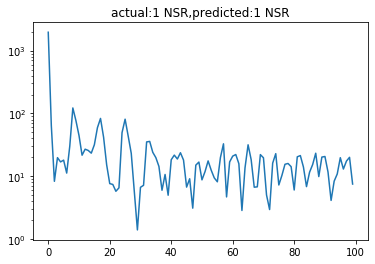

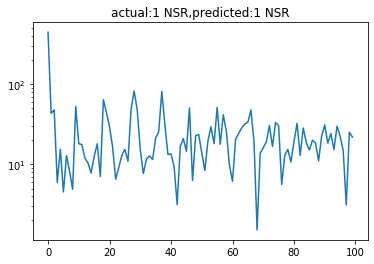

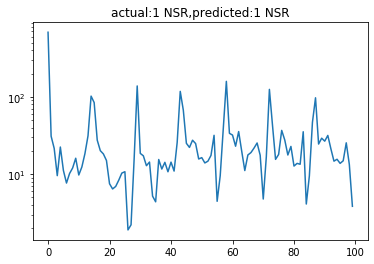

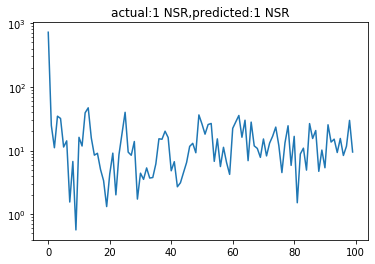

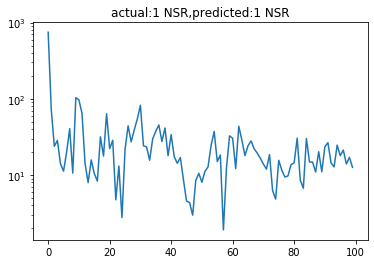

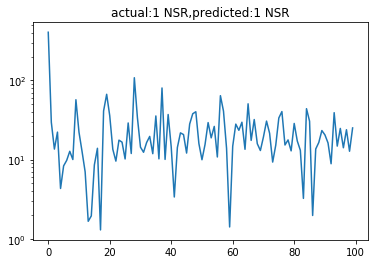

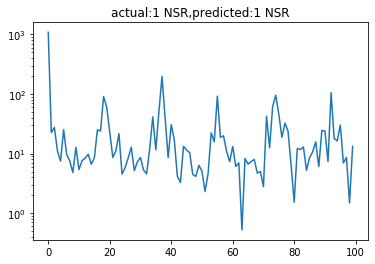

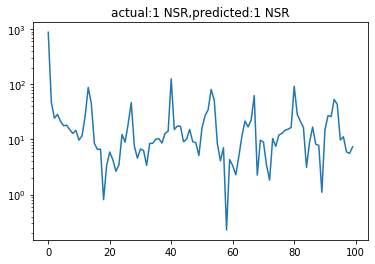

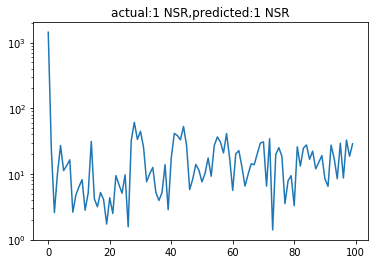

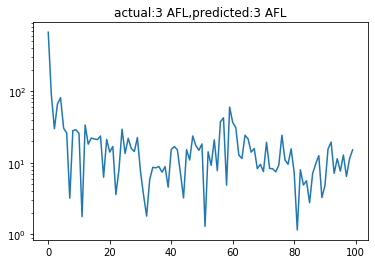

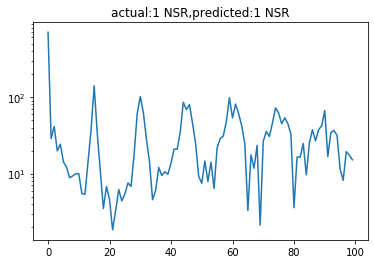

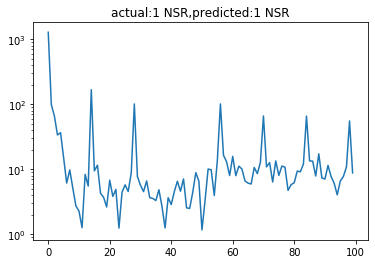

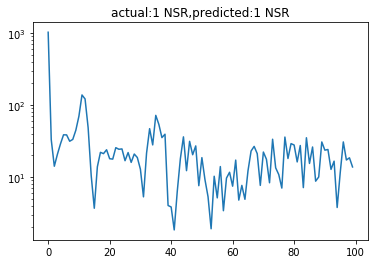

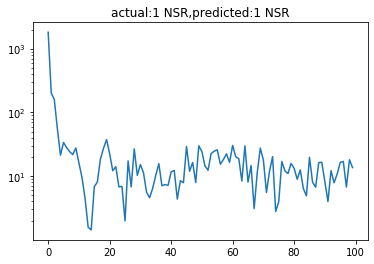

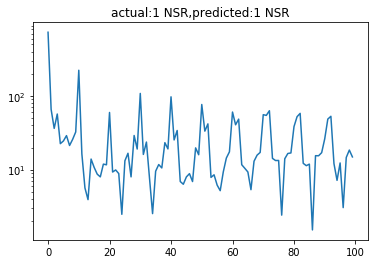

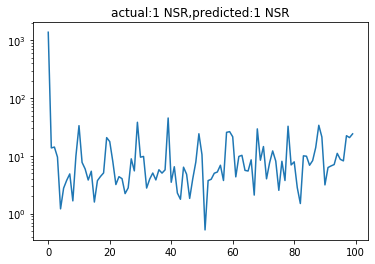

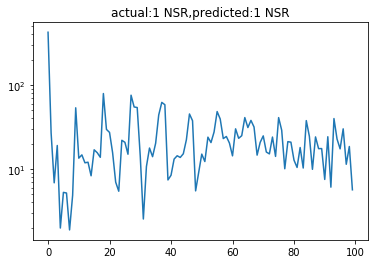

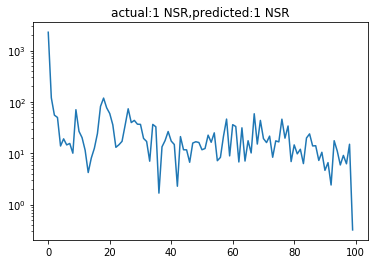

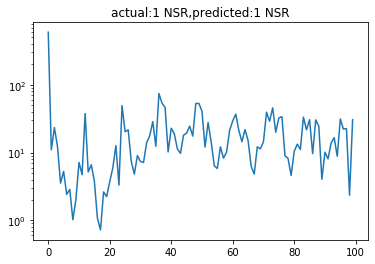

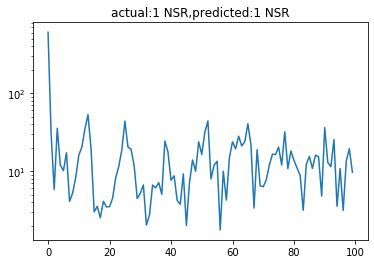

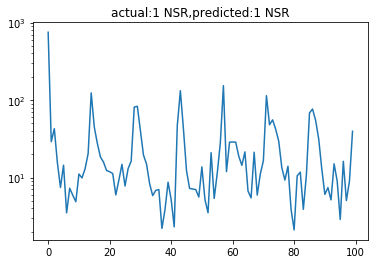

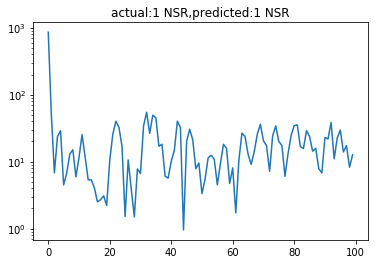

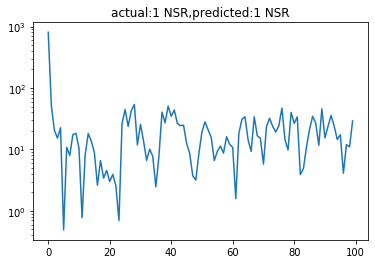

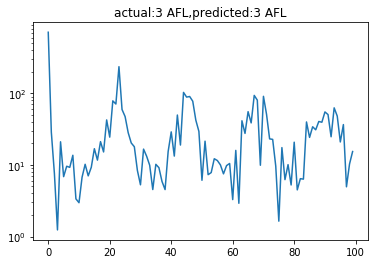

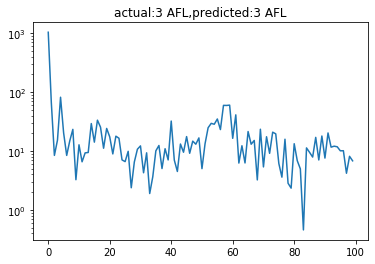

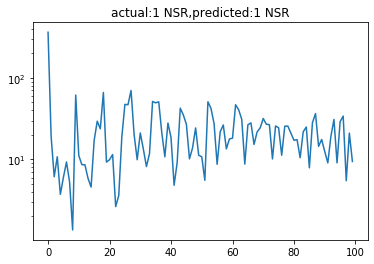

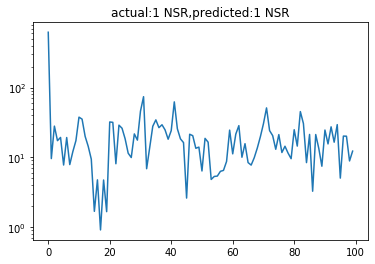

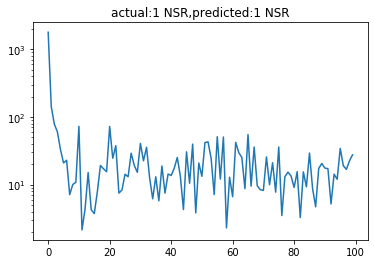

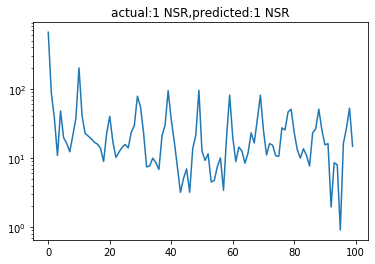

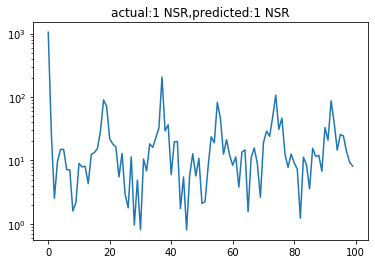

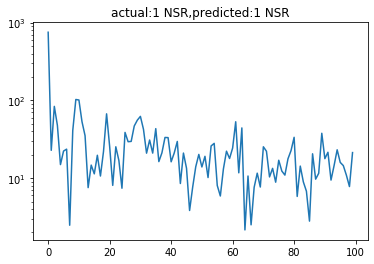

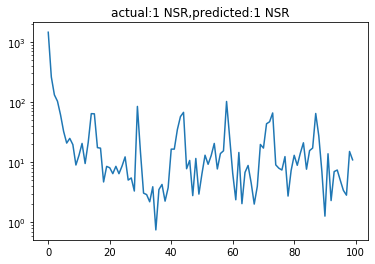

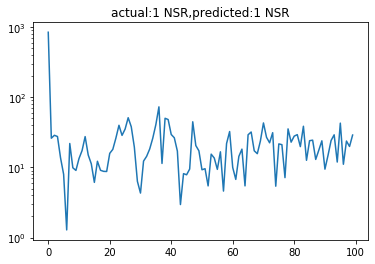

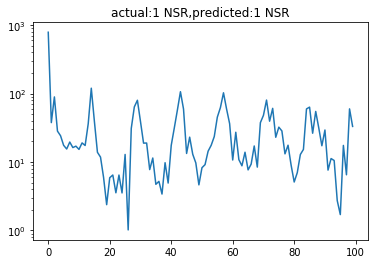

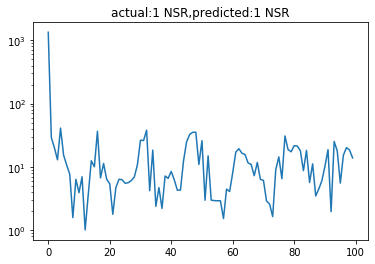

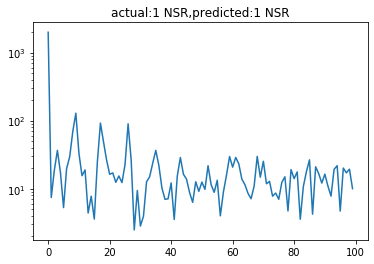

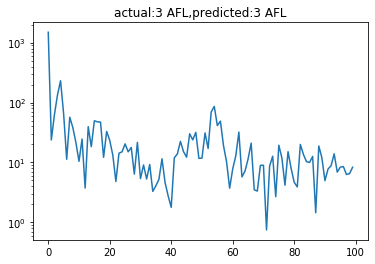

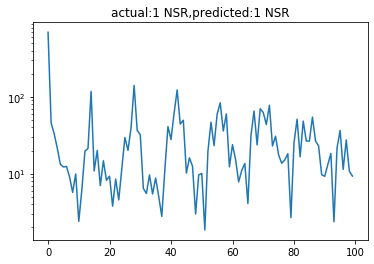

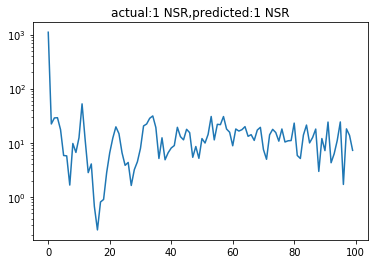

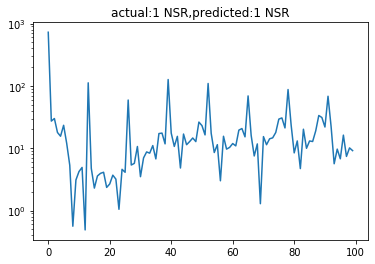

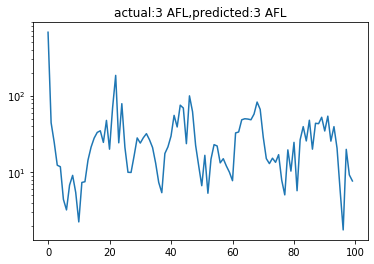

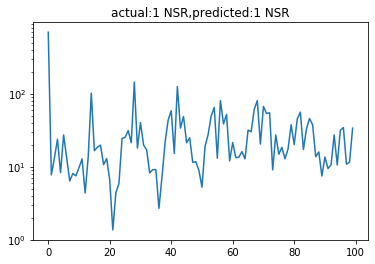

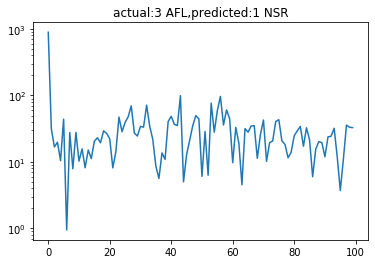

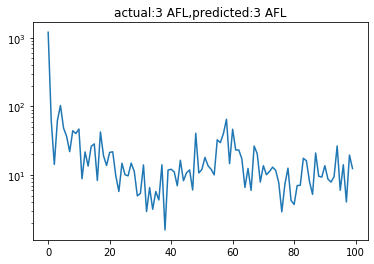

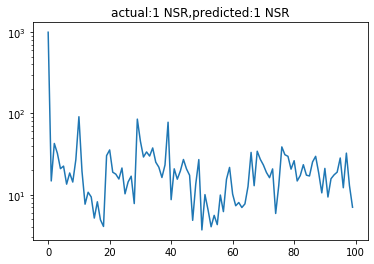

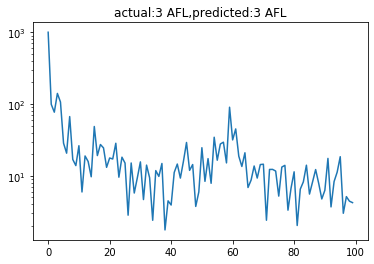

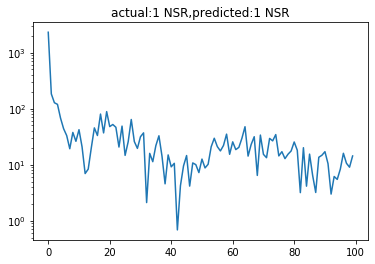

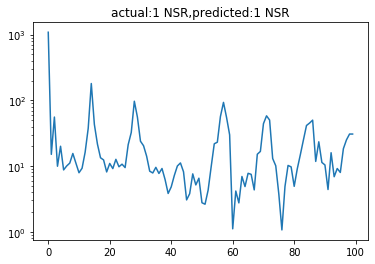

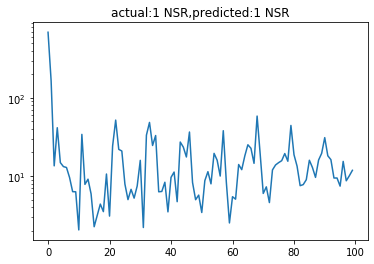

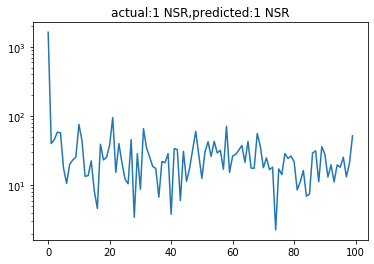

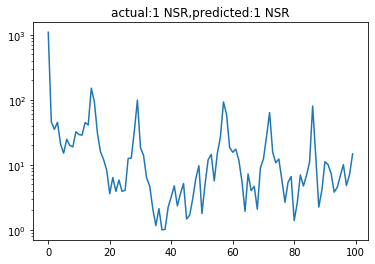

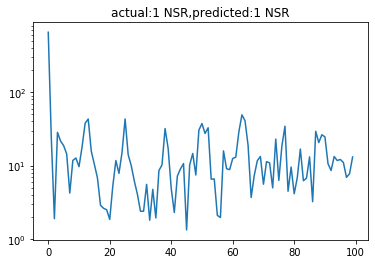

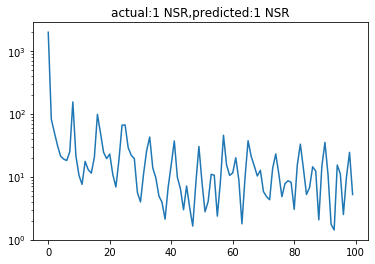

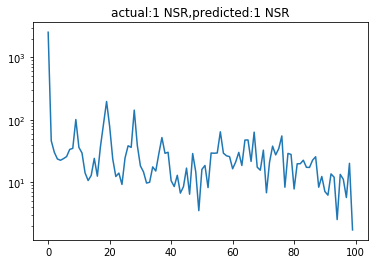

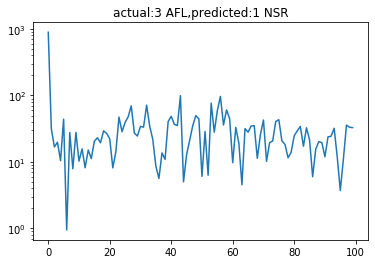

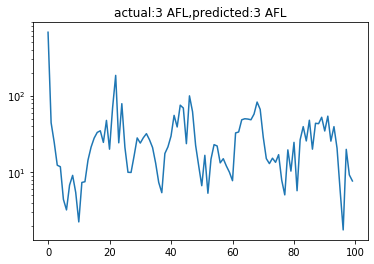

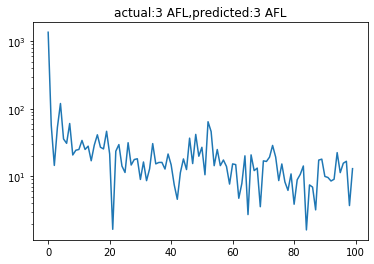

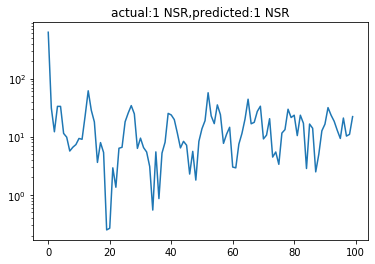

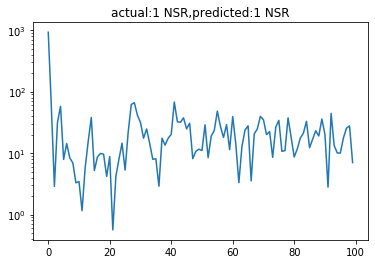

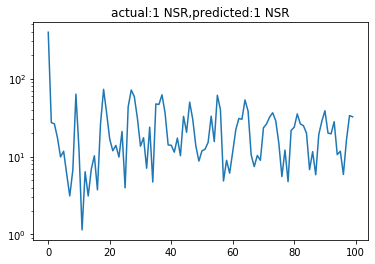

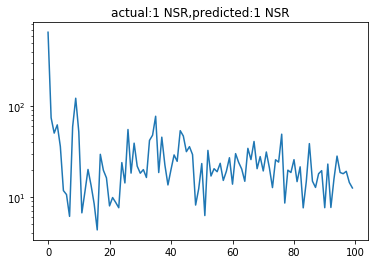

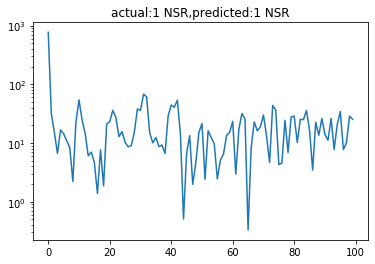

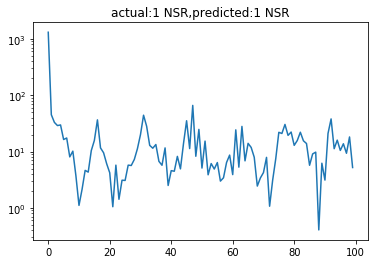

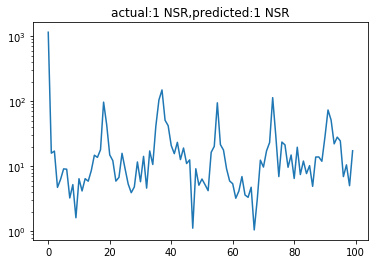

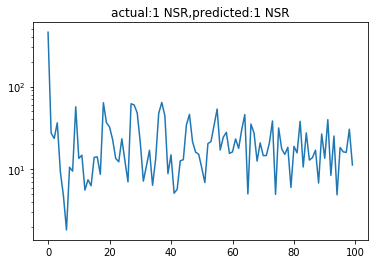

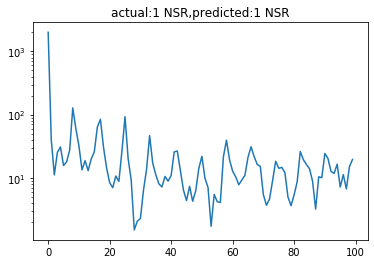

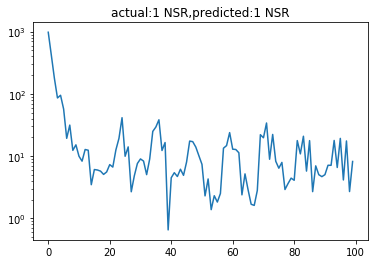

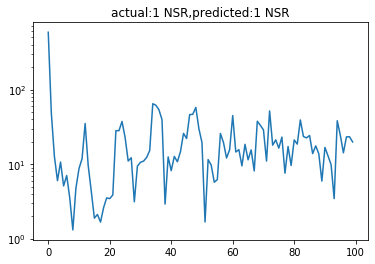

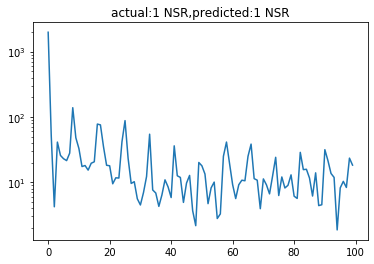

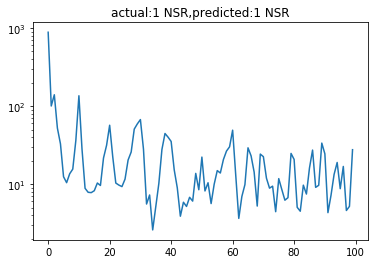

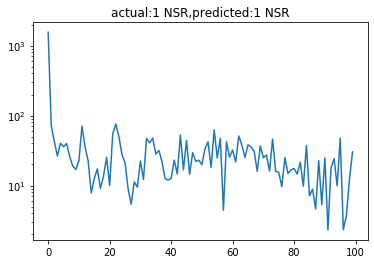

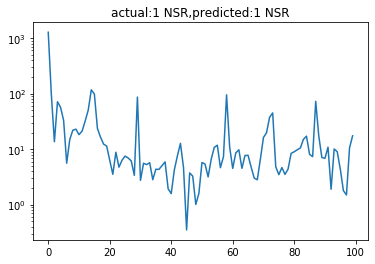

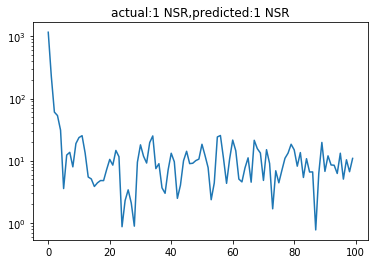

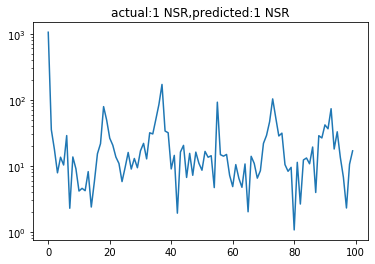

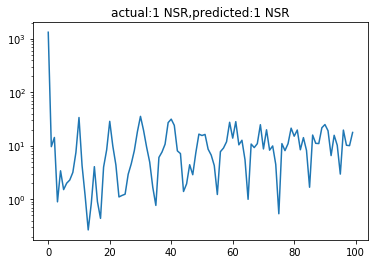

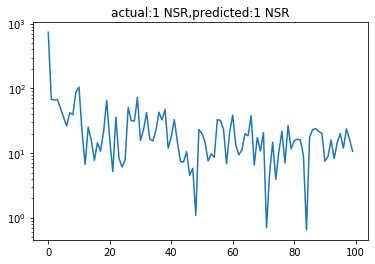

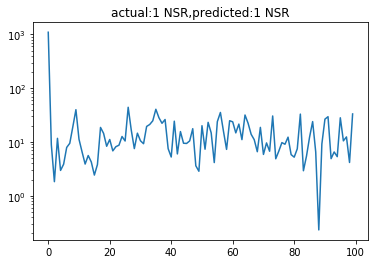

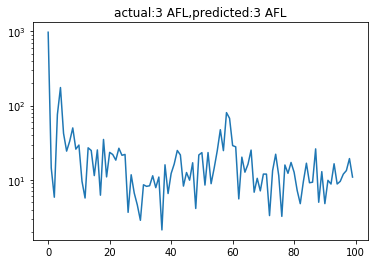

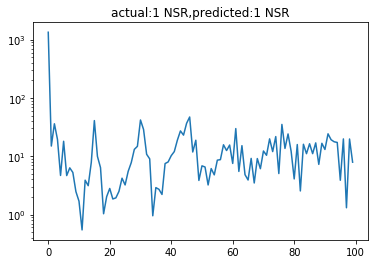

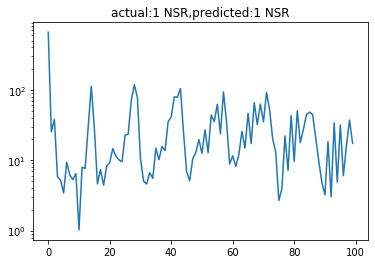

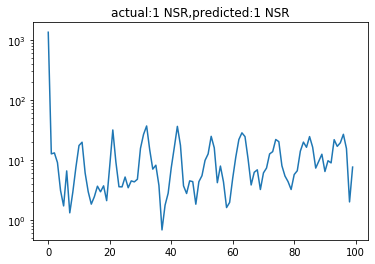

In [82]:
#displaying the data and prediction and actual labels
import matplotlib.pyplot as plt
for (a,b,c) in zip(Xval,Yval,Ypred):
    plt.semilogy(a)
    plt.title("actual:{},predicted:{}".format(b,c))
    plt.show()
